## Libraries Used

In [1]:
library(kableExtra)
library(plyr)
library(dplyr)
library(randomForest)
library(ggbiplot)
library(magrittr)
library(tidyr)
library(ggplot2)
library(DataExplorer)
library(tidyverse) 
library(cluster)
library(factoextra)
library(formatR)
library(tidyverse)
library(qdap)
library(reshape)
library(textclean)
library(tm)
library(stringi)
library(caret)
library(e1071)
library(stopwords)
library(tokenizers)
library(factoextra)
library(wordcloud)
library(RColorBrewer)
library(glmulti) 
library(lubridate) 
library(BBmisc) 
library(modelr)
library(reshape2)
library(rpart)
library(funModeling)
library(cowplot)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Loading required package: scales
Loading required package: grid

Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.4.2     v purrr   0.2.5
v readr   1.1.1     v stringr 1.3.1
v tibble  1.4.2     v forcats 0.3.0

## Read Dataset

In [2]:
n_max_market = 500000
n_max_news = 500000

In [3]:
market_all = read_csv("market_train_df.csv",n_max = n_max_market)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  time = col_datetime(format = ""),
  assetCode = col_character(),
  assetName = col_character(),
  volume = col_double(),
  close = col_double(),
  open = col_double(),
  returnsClosePrevRaw1 = col_double(),
  returnsOpenPrevRaw1 = col_double(),
  returnsClosePrevMktres1 = col_character(),
  returnsOpenPrevMktres1 = col_character(),
  returnsClosePrevRaw10 = col_double(),
  returnsOpenPrevRaw10 = col_double(),
  returnsClosePrevMktres10 = col_character(),
  returnsOpenPrevMktres10 = col_character(),
  returnsOpenNextMktres10 = col_double(),
  universe = col_double()
)


In [4]:
head(market_all)

X1,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,2007-02-01 22:00:00,A.N,Agilent Technologies Inc,2606900,32.19,32.17,0.0059375000,0.005312500,NA,NA,-0.001860465,0.000622084,NA,NA,0.034672040,1
1,2007-02-01 22:00:00,AAI.N,AirTran Holdings Inc,2051600,11.12,11.08,0.0045167118,-0.007168459,NA,NA,-0.078707539,-0.088065844,NA,NA,0.027803280,0
2,2007-02-01 22:00:00,AAP.N,Advance Auto Parts Inc,1164800,37.51,37.99,-0.0115942029,0.025647948,NA,NA,0.014332071,0.045404513,NA,NA,0.024432913,1
3,2007-02-01 22:00:00,AAPL.O,Apple Inc,23747329,84.74,86.23,-0.0115478829,0.016323885,NA,NA,-0.048613450,-0.037181778,NA,NA,-0.007424612,1
4,2007-02-01 22:00:00,ABB.N,ABB Ltd,1208600,18.02,18.01,0.0117911286,0.025042686,NA,NA,0.012928612,0.020396601,NA,NA,-0.017994120,1
5,2007-02-01 22:00:00,ABC.N,AmerisourceBergen Corp,1657300,52.37,52.40,-0.0001909126,0.008468052,NA,NA,0.088999792,0.077745784,NA,NA,0.058680420,1


In [5]:
print("Dimensions of Market")
dim(market_all)

[1] "Dimensions of Market"


[1] 500000     17

In [6]:
news_all = read_csv("news_train_df.csv",n_max = n_max_news)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_integer(),
  time = col_datetime(format = ""),
  sourceTimestamp = col_datetime(format = ""),
  firstCreated = col_datetime(format = ""),
  sourceId = col_character(),
  headline = col_character(),
  provider = col_character(),
  subjects = col_character(),
  audiences = col_character(),
  headlineTag = col_character(),
  marketCommentary = col_character(),
  assetCodes = col_character(),
  assetName = col_character(),
  relevance = col_double(),
  sentimentNegative = col_double(),
  sentimentNeutral = col_double(),
  sentimentPositive = col_double()
)
See spec(...) for full column specifications.


In [7]:
head(news_all)

X1,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32,2007-01-01 04:29:32,2007-01-01 04:29:32,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil in 06,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', 'LEN', 'CRU'}",...,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35,2007-01-01 07:03:34,2007-01-01 07:03:34,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'IL', 'MEAST', 'BD', 'US', 'HT', 'RTRS', 'CO', 'LIF', 'LEN'}",...,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56,2007-01-01 11:29:56,2007-01-01 11:29:56,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'RET', 'ENR', 'ID', 'BG', 'US', 'PRESS', 'IQ', 'RO', 'NGS', 'TH', 'BY', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37,2007-01-01 12:08:37,2007-01-01 12:08:37,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'BUS', 'ENT', 'WWW', 'LEI', 'US', 'PRESS', 'USC', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37,2007-01-01 12:08:37,2007-01-01 12:08:37,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'BUS', 'ENT', 'WWW', 'LEI', 'US', 'PRESS', 'USC', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,0,0,0
5,2007-01-01 12:08:37,2007-01-01 12:08:37,2007-01-01 12:08:37,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'BUS', 'ENT', 'WWW', 'LEI', 'US', 'PRESS', 'USC', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,0,2,3


In [8]:
print("Dimensions of News")
dim(news_all)

[1] "Dimensions of News"


[1] 500000     36

In [9]:
dtype.market = as.data.frame(sapply(market_all,class))
dtype.news = as.data.frame(sapply(news_all,class))
print("Market Details Data Types")
head(dtype.market,n=1)
print("News Details Data Types")
head(dtype.news,n=1)

[1] "Market Details Data Types"


X1,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
integer,POSIXct,character,character,numeric,numeric,numeric,numeric,numeric,character,character,numeric,numeric,character,character,numeric,numeric


[1] "News Details Data Types"


X1,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
integer,POSIXct,POSIXct,POSIXct,character,character,integer,integer,character,character,...,integer,integer,integer,integer,integer,integer,integer,integer,integer,integer


## Clean Dataset

In [10]:
market = market_all[,colSums(is.na(market_all))<nrow(market_all)]

In [11]:
news = news_all[,colSums(is.na(news_all))<nrow(news_all)]

In [12]:
print("Dimensions of Market after cleaning")
dim(market)
print("Dimensions of News after cleaning")
dim(news)

[1] "Dimensions of Market after cleaning"


[1] 500000     17

[1] "Dimensions of News after cleaning"


[1] 500000     36

## Exploratory Data Analysis

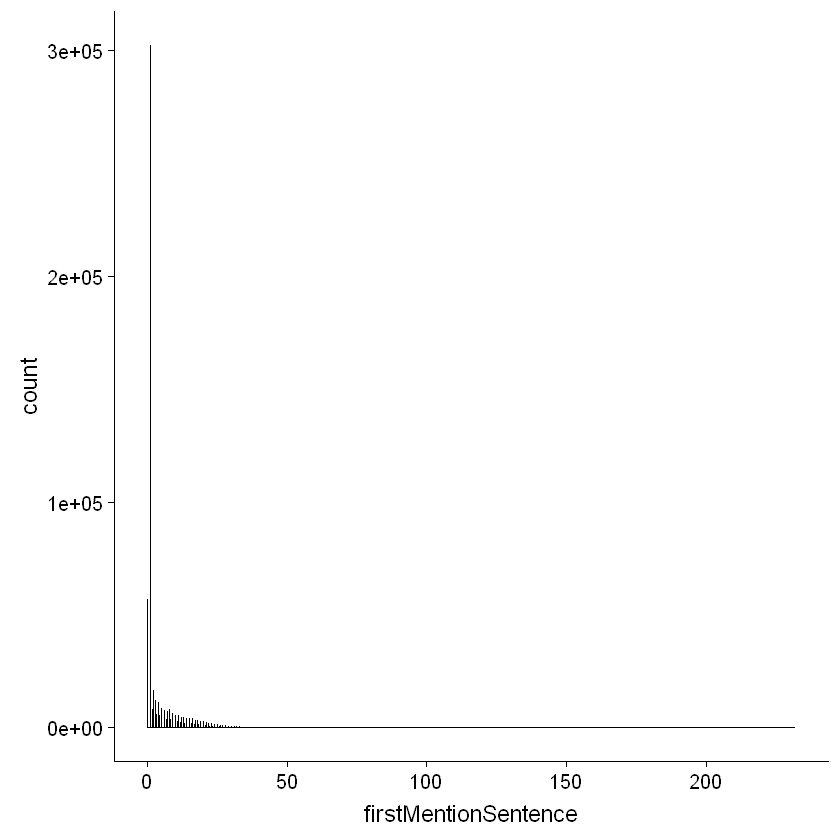

In [13]:
ggplot(data = news, mapping = aes(x = firstMentionSentence, colour = relevance)) +
  geom_freqpoly(binwidth = 0.1)

The tallest peak is at 1 which means the asset is mentioned most in the headlines.

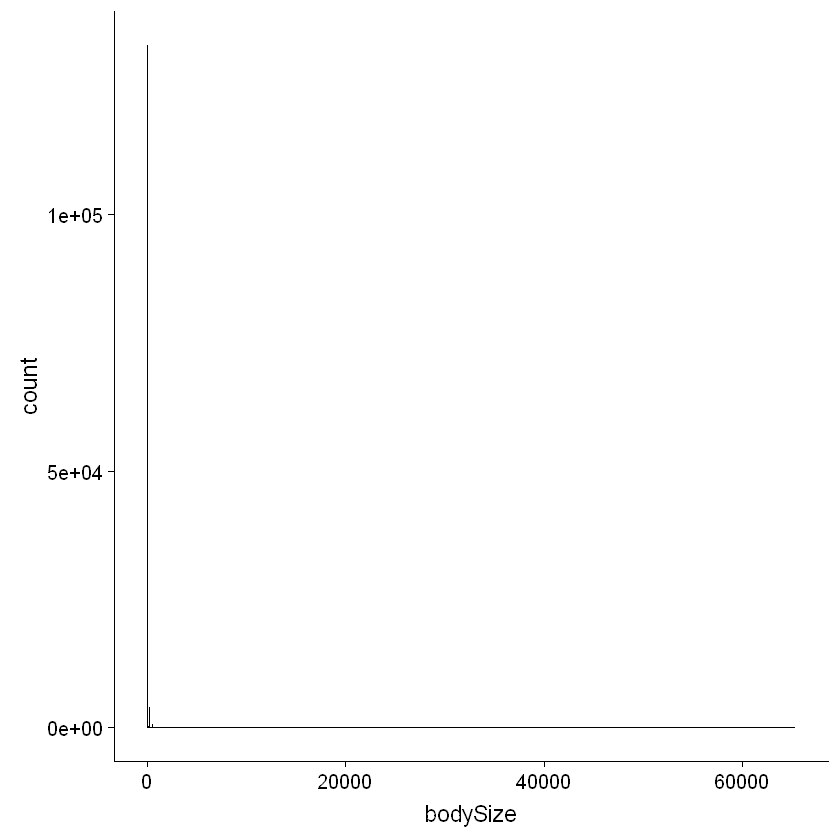

In [14]:
ggplot(data = news, mapping = aes(x = bodySize)) +
  geom_freqpoly(binwidth = 0.2)

The article bodysize is mostly 500-3000.

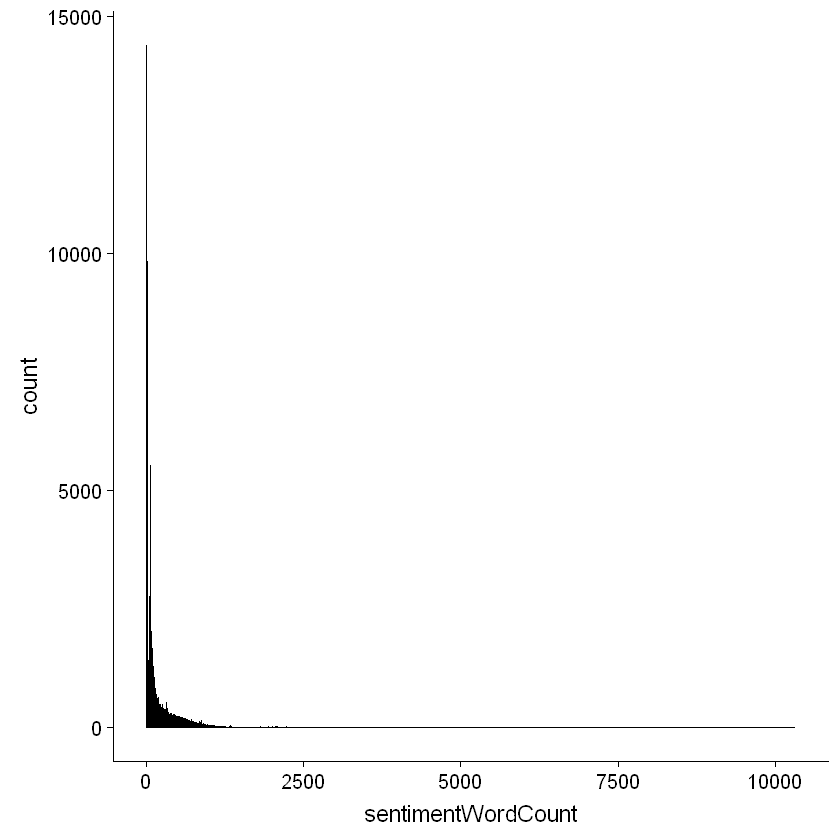

In [15]:
ggplot(data = news, mapping = aes(x = sentimentWordCount)) +
  geom_freqpoly(binwidth = 0.5)

Each article is more likely to have 5-500 sentiment words in it. However, the sentiment may be positive, negative or neutral

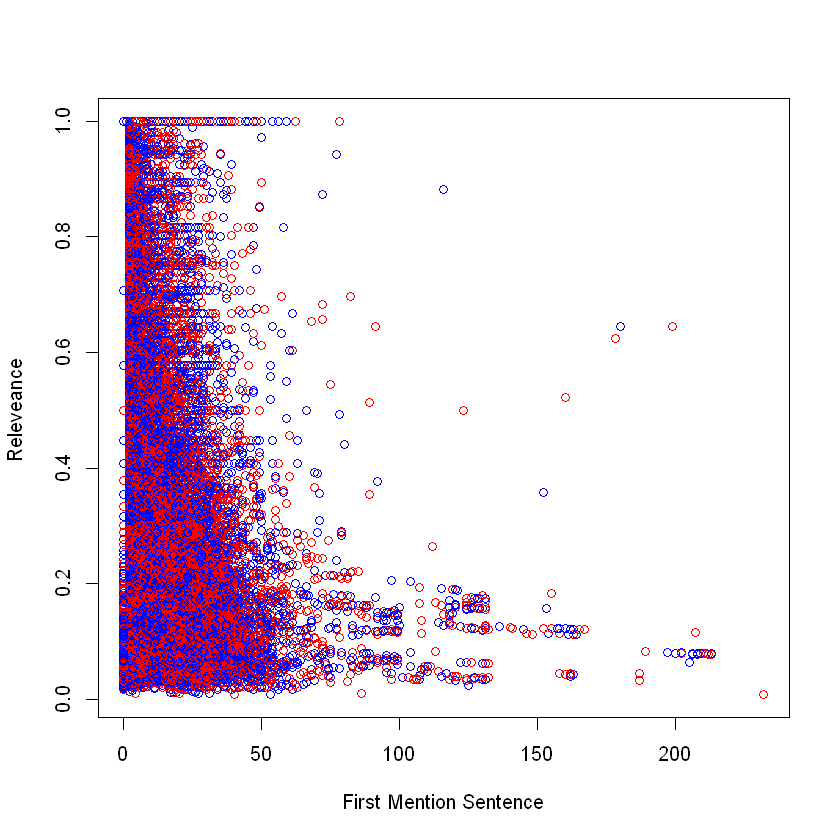

In [16]:
plot(news$firstMentionSentence,news$relevance,col = c("red","blue"),
xlab="First Mention Sentence", ylab="Releveance ")

We can see that if A first mention sentence mentions assets scored in headlines, first sentence of body and so on,
the news_all has high relevance. We can see highest relevance at 1,2... first mention sentence.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


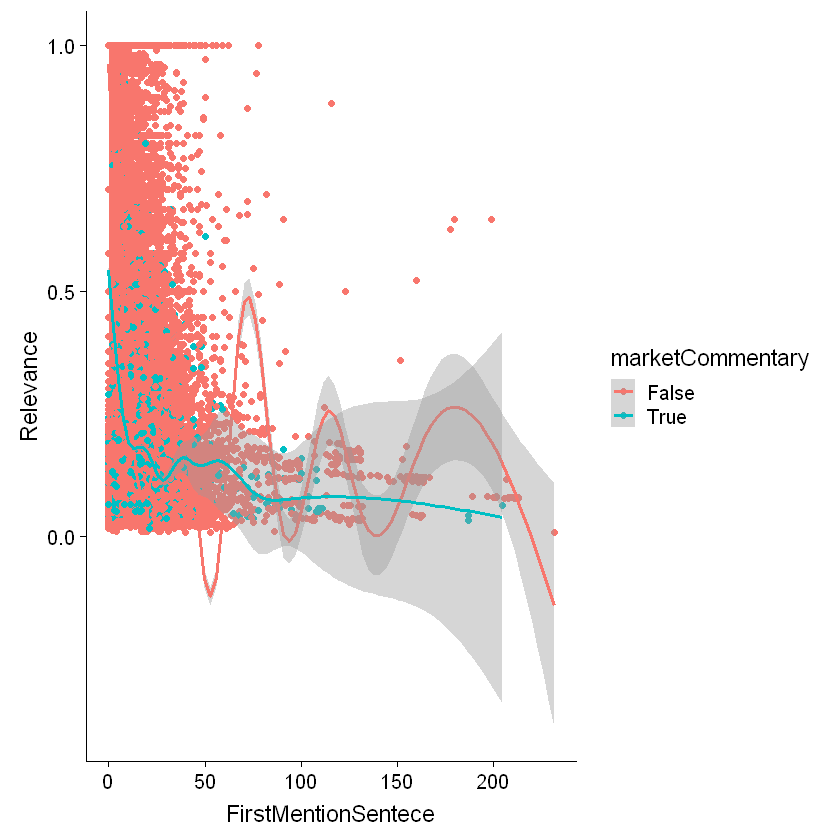

In [17]:
 qplot( firstMentionSentence,relevance, color= marketCommentary, data=news,
 geom = c("point", "smooth"), xlab="FirstMentionSentece", ylab="Relevance")

Now we have plotted the same features using the qplot using marketCommentary and we get more interesting patters.
Like the above plot, there is high relevance seen when firstmentionSentence is 1-3. 
Later there is drop in relevance when market Comentary is not made and a decent bulge between 7-13 first mention line 
when the market commentary is made in news_all.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


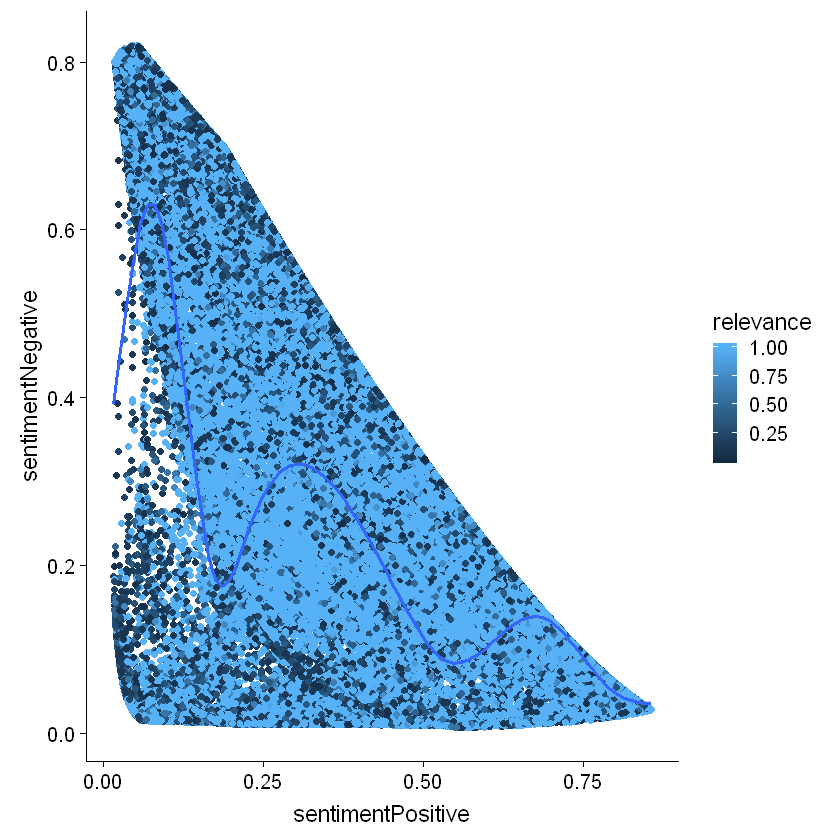

In [18]:
 qplot(sentimentPositive,sentimentNegative,data = news ,geom = c("point", "smooth"), color=relevance) 

We have an interesting pattern here, 
When there is higher probality of the sentment being positive, there is higher relevance and vice Versa, when there is,
probablity of being a negative sentiment, the relevance is low.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


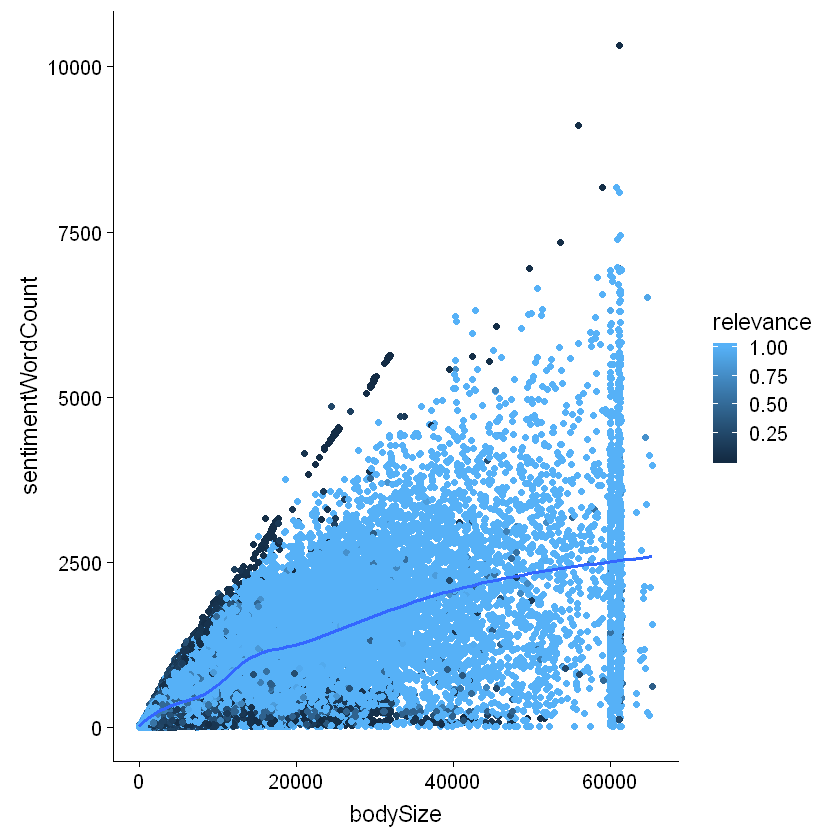

In [19]:
 qplot(bodySize,sentimentWordCount,data = news ,geom = c("point", "smooth"), color=relevance) 

We can observe from the above graph that as the body size and the sentiment word count increases, there is drop in relevance.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


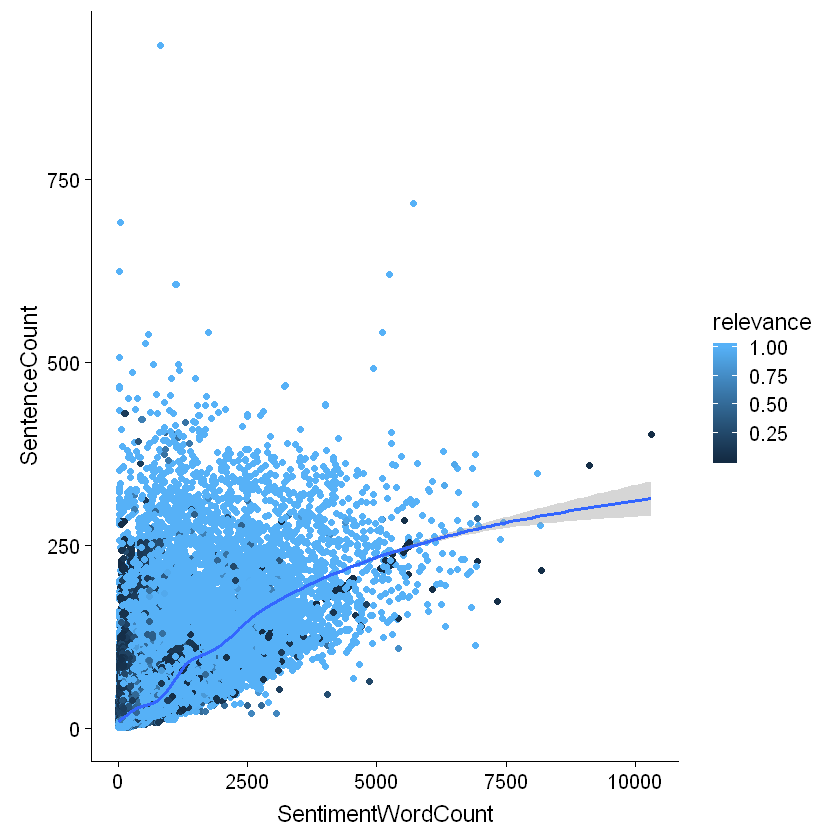

In [20]:
 qplot( sentimentWordCount,sentenceCount, color= relevance, data=news,
 geom = c("point", "smooth"), xlab="SentimentWordCount", ylab="SentenceCount")

We can say from the above plot that when the sentence count is below 50, the article is more likely
to have high relevance with market and stock information.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


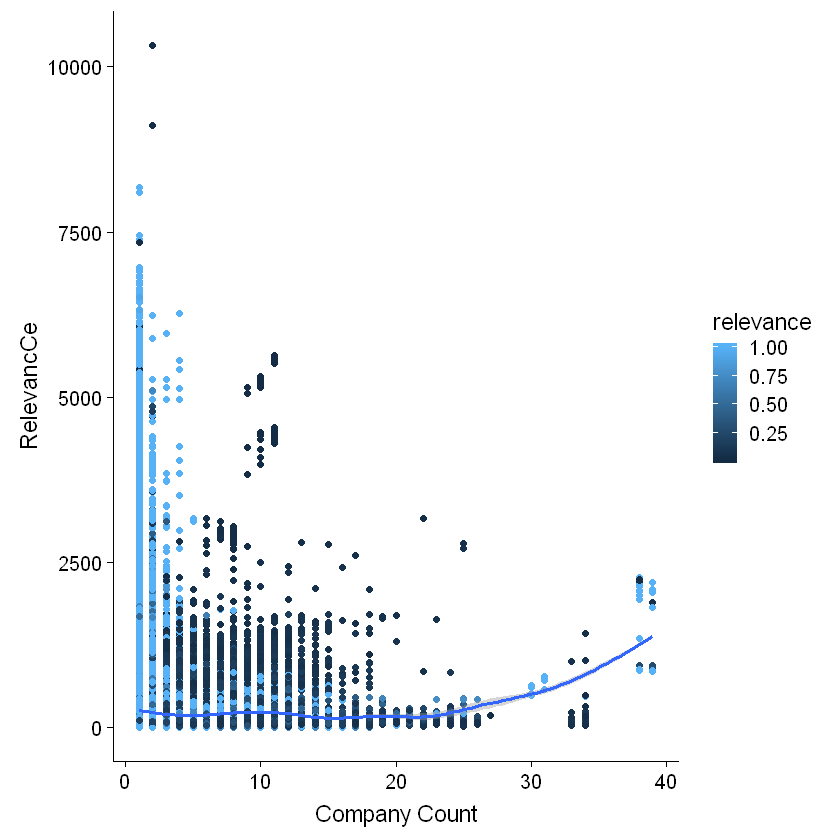

In [21]:
qplot( companyCount,sentimentWordCount, color= relevance, data=news,
 geom = c("point", "smooth"), xlab="Company Count", ylab="RelevancCe")

We can observe that lesser the company count ....higher is the relevance. So, we won't mistake into believing
that higher company count in an article increases it's relevance.

10 columns ignored with more than 50 categories.
time: 342893 categories
sourceTimestamp: 343421 categories
firstCreated: 238891 categories
sourceId: 371502 categories
headline: 327864 categories
subjects: 91385 categories
audiences: 11189 categories
headlineTag: 92 categories
assetCodes: 6169 categories
assetName: 6015 categories



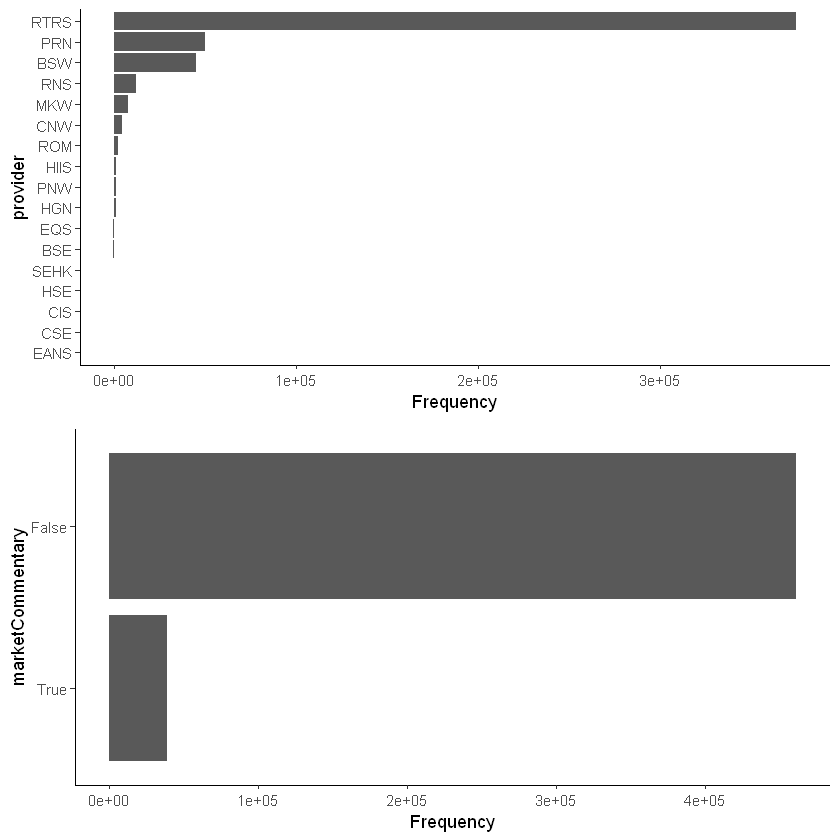

In [22]:
plot_bar(news, ggtheme = theme_classic())

From the above plot bar we can observse following trends:

1. RTRS has the highest count in providers
2. The headline tag has maximum tags from Press Digest
3. The news articles have less frequency of making a market commentary in it.

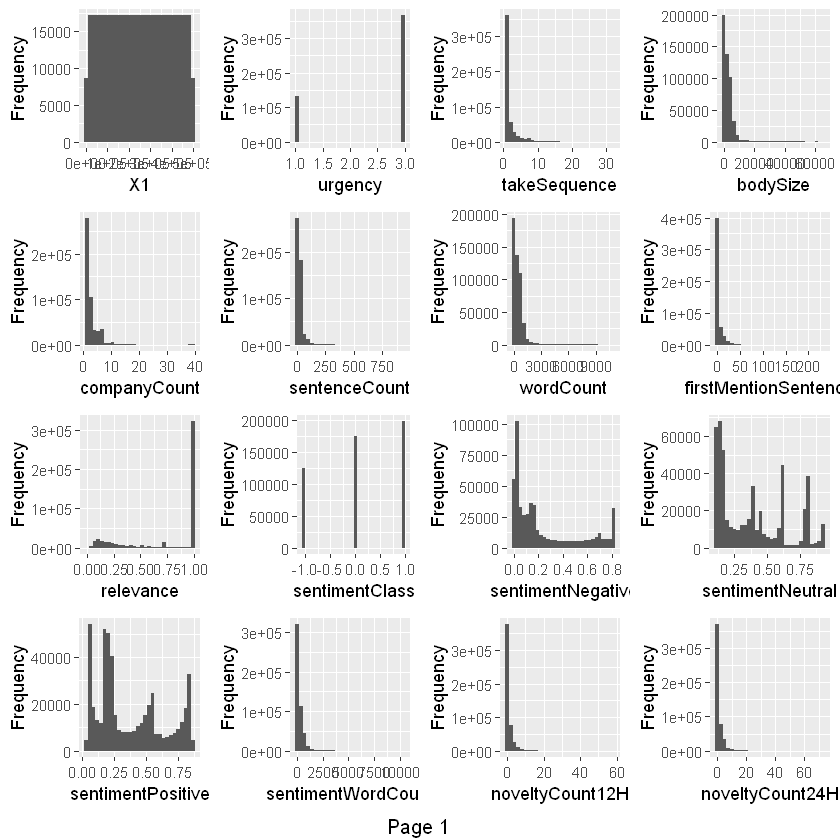

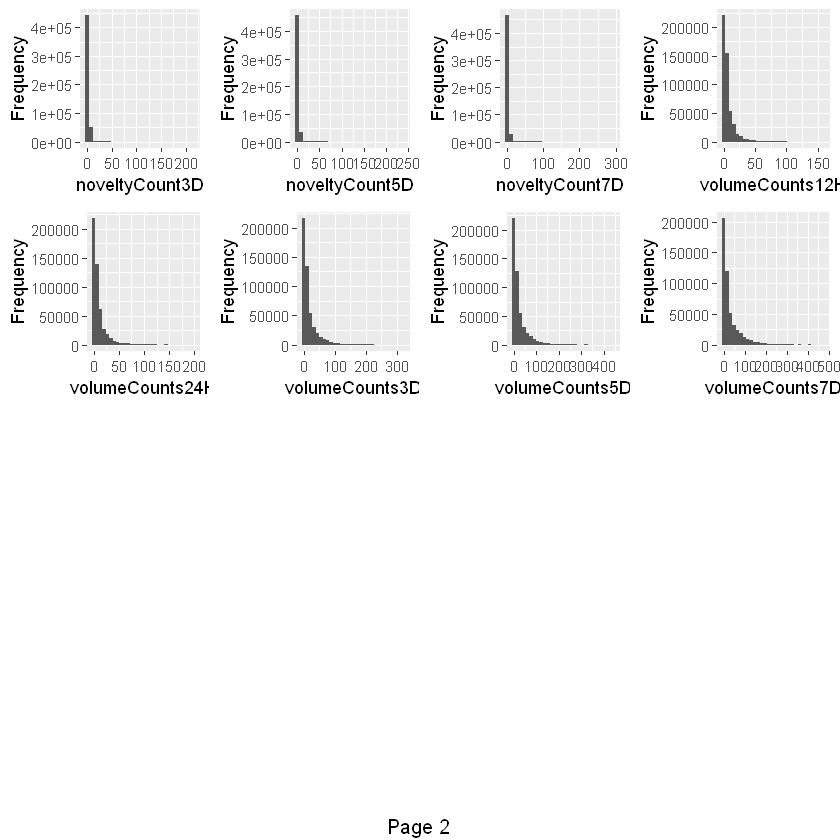

In [23]:
plot_histogram(news)

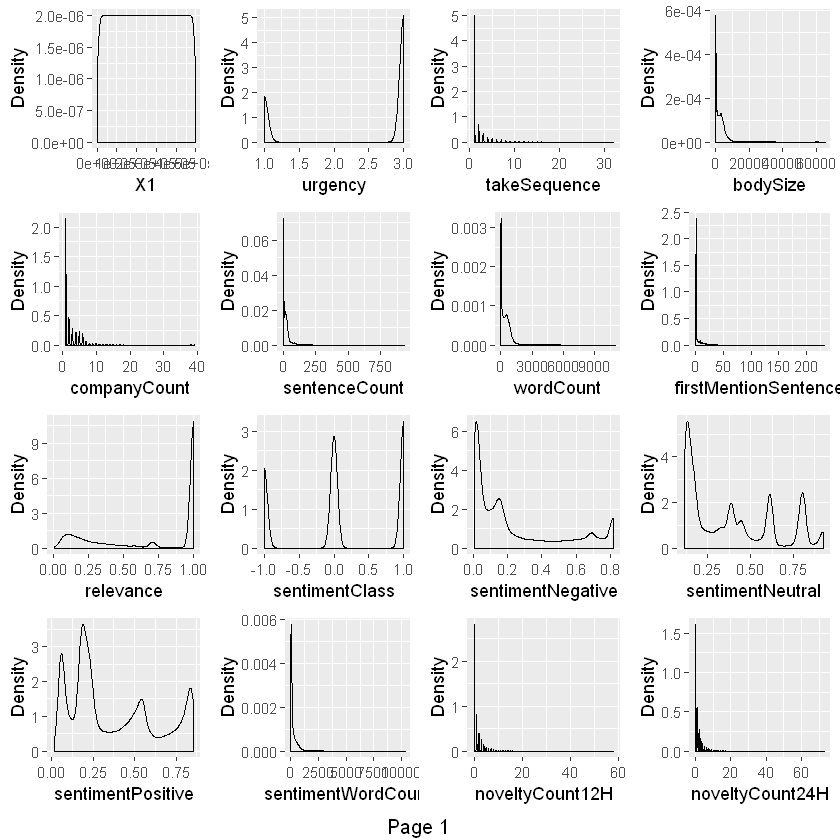

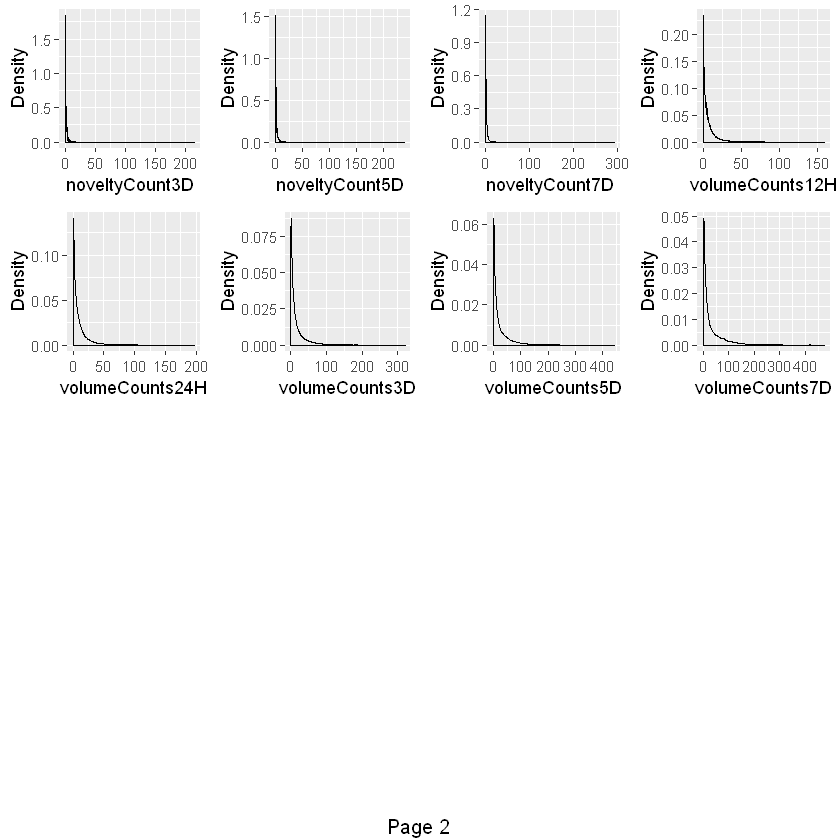

In [24]:
plot_density(news)

## Feature Engineering

In [25]:
set.seed(137)
sampleMarketData <- market
nameCounts <- sampleMarketData %>% count(assetName, sort = TRUE)
nameCounts
nameCountsForPlot <- head(nameCounts,20)

assetName,n
Unknown,3819
Caleres Inc,672
Comcast Corp,672
Qwest Corp,672
Waste Management Inc,672
Petroleo Brasileiro SA Petrobras,573
Royal Dutch Shell PLC,573
Wendys Co,506
Molex LLC,371
ABB Ltd,337


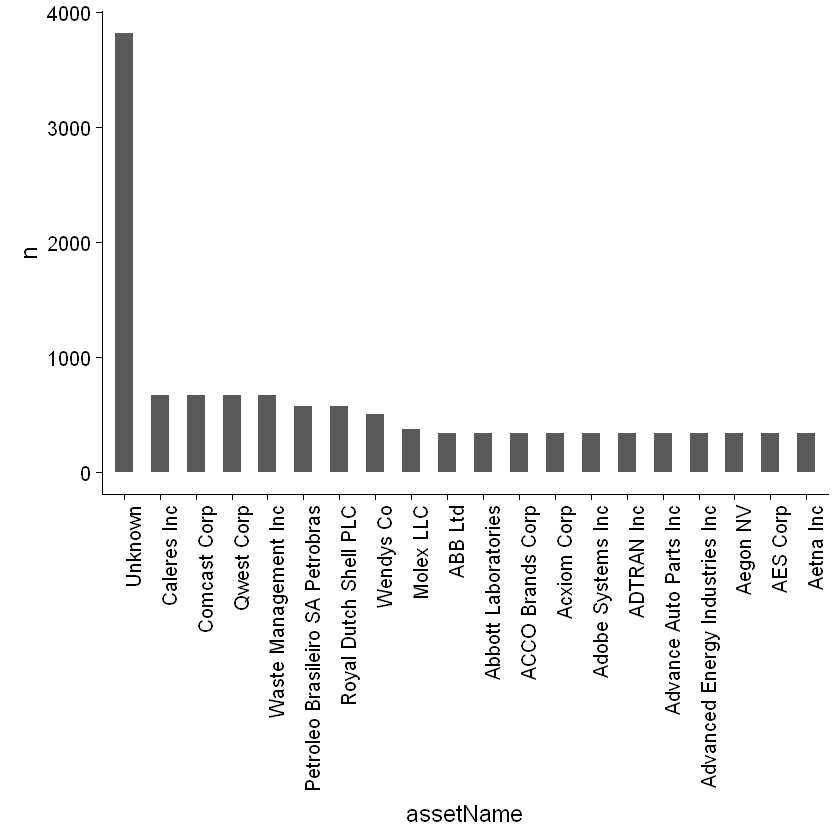

In [26]:
g <- ggplot(nameCountsForPlot, aes(assetName,n)) + geom_bar(stat="identity", width=.5)
g <- g + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_x_discrete(limits = nameCountsForPlot$assetName)
print(g)

In [27]:
codeCounts <- sampleMarketData %>% count(assetCode, sort = TRUE)
codeCountsTop10 <- head(codeCounts,10)
top10 <- market_all  %>% 
    filter(assetCode %in% codeCountsTop10$assetCode) %>%
    mutate(date=as.Date(time))
top10

X1,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,date
0,2007-02-01 22:00:00,A.N,Agilent Technologies Inc,2606900,32.19,32.17,0.0059375000,0.0053125000,NA,NA,-0.001860465,0.000622084,NA,NA,0.034672040,1,2007-02-01
2,2007-02-01 22:00:00,AAP.N,Advance Auto Parts Inc,1164800,37.51,37.99,-0.0115942029,0.0256479482,NA,NA,0.014332071,0.045404513,NA,NA,0.024432913,1,2007-02-01
3,2007-02-01 22:00:00,AAPL.O,Apple Inc,23747329,84.74,86.23,-0.0115478829,0.0163238847,NA,NA,-0.048613450,-0.037181778,NA,NA,-0.007424612,1,2007-02-01
4,2007-02-01 22:00:00,ABB.N,ABB Ltd,1208600,18.02,18.01,0.0117911286,0.0250426864,NA,NA,0.012928612,0.020396601,NA,NA,-0.017994120,1,2007-02-01
5,2007-02-01 22:00:00,ABC.N,AmerisourceBergen Corp,1657300,52.37,52.40,-0.0001909126,0.0084680523,NA,NA,0.088999792,0.077745784,NA,NA,0.058680420,1,2007-02-01
6,2007-02-01 22:00:00,ABD.N,ACCO Brands Corp,1186200,23.63,24.13,-0.0207210941,-0.0074043603,NA,NA,0.005104211,0.026808511,NA,NA,-0.044284582,0,2007-02-01
8,2007-02-01 22:00:00,ABT.N,Abbott Laboratories,5692300,52.87,52.50,-0.0024528302,-0.0047393365,NA,NA,0.001515439,-0.004927976,NA,NA,0.009860691,1,2007-02-01
9,2007-02-01 22:00:00,ABV.N,Companhia de Bebidas das Americas Ambev,401800,52.46,52.10,0.0141117340,0.0247836349,NA,NA,0.042320683,0.027410767,NA,NA,0.012917154,1,2007-02-01
11,2007-02-01 22:00:00,ACF.N,General Motors Financial Company Inc,1375200,27.25,27.24,0.0040530582,0.0160387915,NA,NA,0.108624898,0.110476967,NA,NA,-0.010286519,1,2007-02-01
12,2007-02-01 22:00:00,ACH.N,Aluminum Corp of China Ltd,1636100,24.52,24.20,0.0878438332,0.0779510022,NA,NA,0.064698220,0.040412726,NA,NA,0.041577329,1,2007-02-01


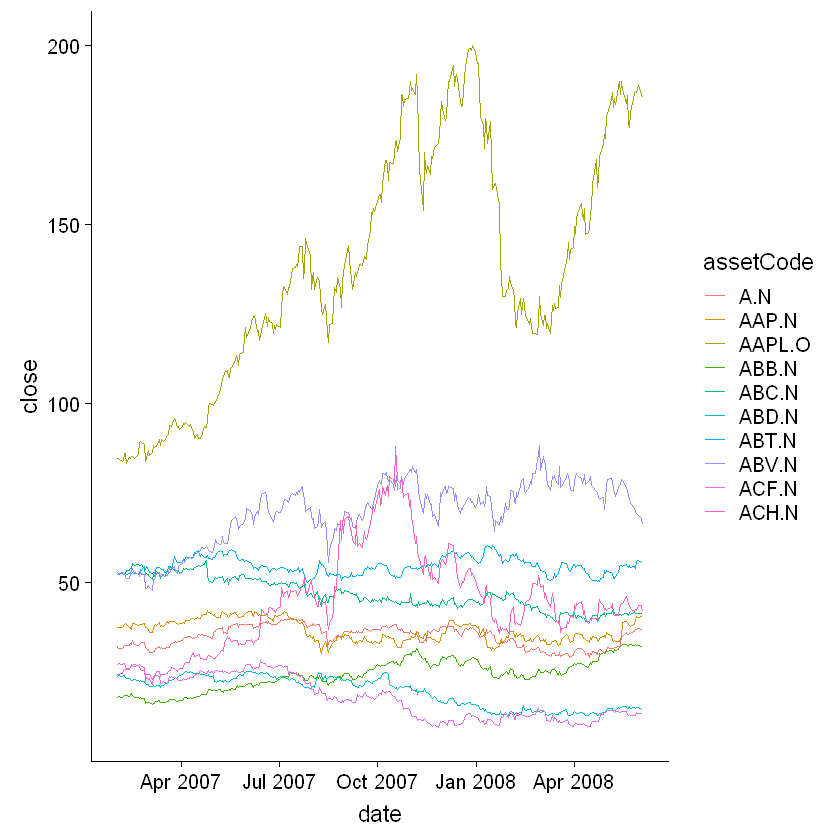

In [28]:
ggplot(top10) + geom_line(aes(date,close,color=assetCode))

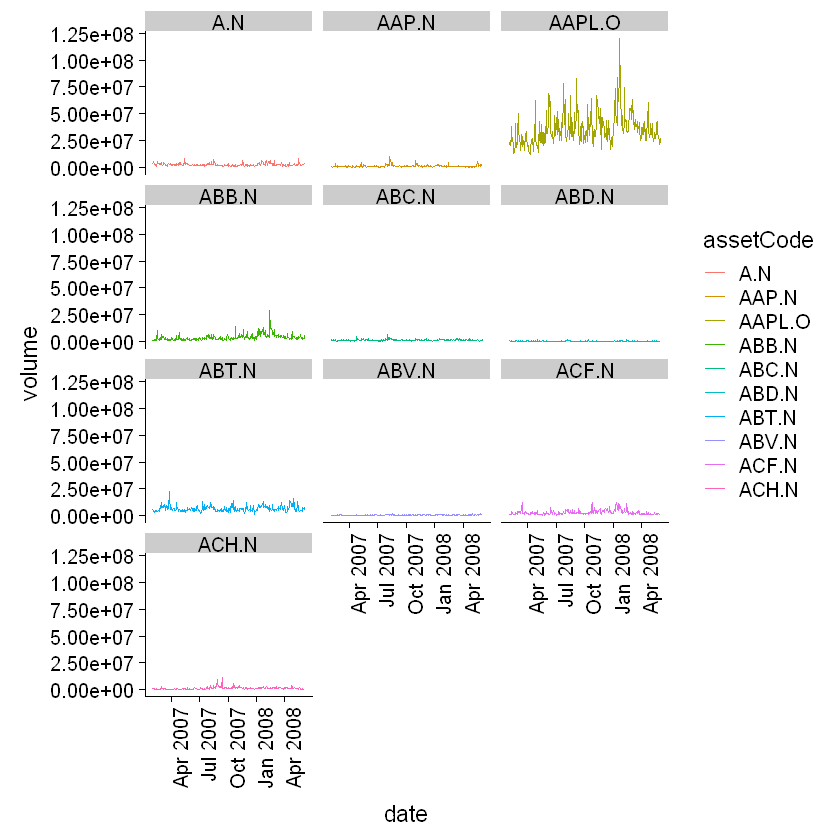

In [29]:
ggplot(top10) + geom_line(aes(date,volume,color=assetCode))  + facet_wrap(~ assetCode, ncol = 3) +  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [30]:
getDataFrameWith50Categories <- function(df){
    factorDF <- mutate_all(df, function(x) as.factor(x))
    features <- names(factorDF)
    for(feature in features){
        if(length(levels(factorDF[,feature]))>50){
            factorDF[feature] <- NULL
        }
        
    }
   factorDF         
}
                           
categoricalData <- getDataFrameWith50Categories(market
                                               )

In [31]:
library(Hmisc)
describe(categoricalData)

categoricalData 

 17  Variables      500000  Observations
--------------------------------------------------------------------------------
X1 
       n  missing distinct 
   5e+05    0e+00    5e+05 

lowest : 0      1      2      3      4     , highest: 499995 499996 499997 499998 499999
--------------------------------------------------------------------------------
time 
       n  missing distinct 
  500000        0      337 

lowest : 2007-02-01 22:00:00 2007-02-02 22:00:00 2007-02-05 22:00:00 2007-02-06 22:00:00 2007-02-07 22:00:00
highest: 2008-05-28 22:00:00 2008-05-29 22:00:00 2008-05-30 22:00:00 2008-06-02 22:00:00 2008-06-03 22:00:00
--------------------------------------------------------------------------------
assetCode 
       n  missing distinct 
  500000        0     2026 

lowest : A.N    AAI.N  AAP.N  AAPL.O AB.N  , highest: ZOLT.O ZQK.N  ZRAN.O ZUMZ.O ZZ.N  
--------------------------------------------------------------------------------
assetName 
       n  missing 

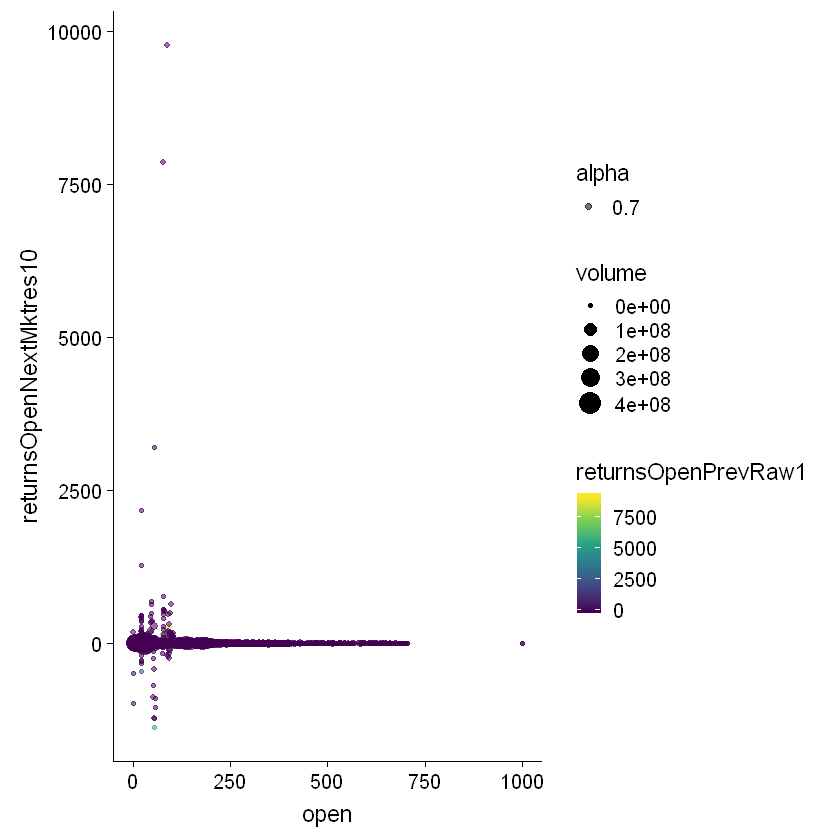

In [33]:
ggplot(market, aes(x=open, y=returnsOpenNextMktres10, col=returnsOpenPrevRaw1, size=volume,alpha=0.7)) + 
    geom_point() +
    scale_color_viridis_c()

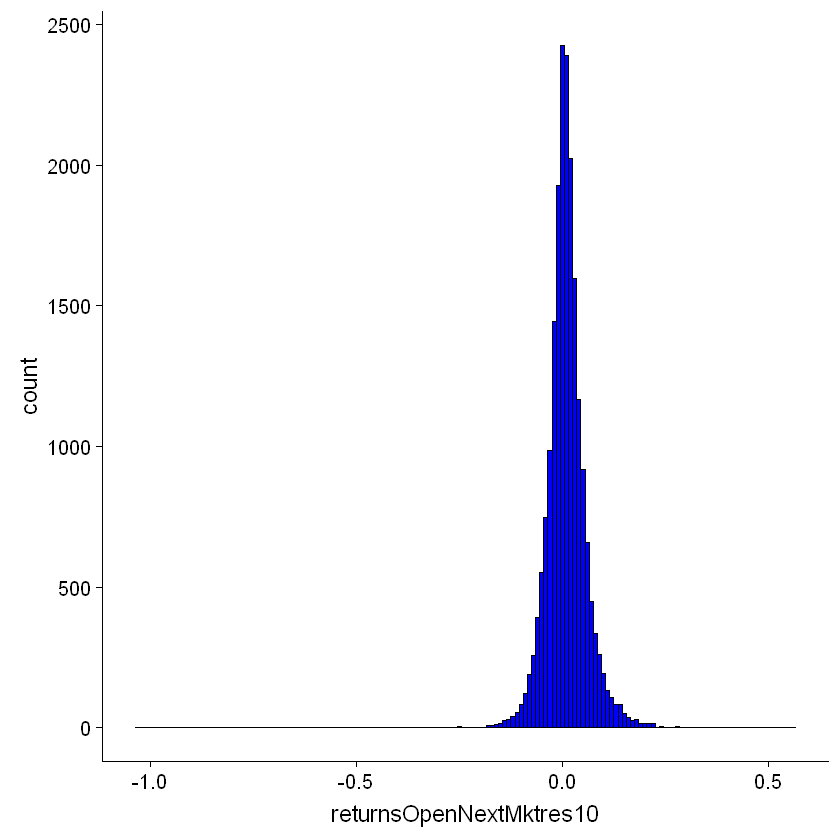

In [13]:
ggplot(data=head(market,n=20000), aes(returnsOpenNextMktres10)) + geom_histogram(binwidth=0.01,color='black',fill='blue')

In [21]:
codeCounts <- news %>% count(assetCodes, sort = TRUE)
codeCountsTop10 <- head(codeCounts,20)
print(codeCountsTop10)

# A tibble: 20 x 2
   assetCodes                                                        n
   <chr>                                                         <int>
 1 {'BARC.DE', 'BARC.L', 'BCS.N', 'BARC.F'}                       5079
 2 {'XON.DE', 'XON.F', 'XOM.N'}                                   3055
 3 {'MSFT.O', 'MSFT.F', 'MSFT.DE', 'MSFT.OQ'}                     2617
 4 {'AAH.AS', 'ABN.N'}                                            2592
 5 {'GE.N'}                                                       2568
 6 {'BP.F', 'BP.PA', 'BP.N', 'BP.L'}                              2503
 7 {'DCXGn.DE', 'DCX.N', 'DCXGn.F'}                               2324
 8 {'WMT.DE', 'WMT.N'}                                            2286
 9 {'BA.N'}                                                       2263
10 {'7203.T', 'TM.N'}                                             2250
11 {'VOD.F', 'VOD.L', 'VOD.N'}                                    2210
12 {'SNE.N', '6758.T'}                                    

## Principal Component Analysis

In [13]:
pca.prcomp = function(data){
  prcomp.data = prcomp(data, center = TRUE,scale. = TRUE)
  print(summary(prcomp.data))
  cat("\n")
  print(str(prcomp.data))
  cat("\n")
  print(ggbiplot(prcomp.data))
  loadings.pca = loadings(prcomp.data)
  print(loadings.pca)
}

In [14]:
pca.princomp = function(data){
  matrix.princomp = as.matrix(data, nrow = dim(data)[1], ncol = dim(data)[2])
  princomp_data = princomp(matrix.princomp)
  print(summary(princomp_data))
  cat("\n")
  print(str(princomp_data))
  cat("\n")
  barplot(height=princomp_data$sdev/princomp_data$sdev[1])
  loadings.pca = loadings(princomp_data)
  print(loadings.pca)
}

In [15]:
market.pca.data = select_if(market, is.numeric)
market.pca.data = select(market.pca.data, -c("universe","volume"))

head(market.pca.data)
colnames(market.pca.data)

X1,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,32.19,32.17,0.0059375000,0.005312500,-0.001860465,0.000622084,0.034672040
1,11.12,11.08,0.0045167118,-0.007168459,-0.078707539,-0.088065844,0.027803280
2,37.51,37.99,-0.0115942029,0.025647948,0.014332071,0.045404513,0.024432913
3,84.74,86.23,-0.0115478829,0.016323885,-0.048613450,-0.037181778,-0.007424612
4,18.02,18.01,0.0117911286,0.025042686,0.012928612,0.020396601,-0.017994120
5,52.37,52.40,-0.0001909126,0.008468052,0.088999792,0.077745784,0.058680420


[1] "X1"                      "close"                  
[3] "open"                    "returnsClosePrevRaw1"   
[5] "returnsOpenPrevRaw1"     "returnsClosePrevRaw10"  
[7] "returnsOpenPrevRaw10"    "returnsOpenNextMktres10"

Importance of components:
                          PC1    PC2    PC3    PC4    PC5    PC6     PC7
Standard deviation     1.4217 1.1356 1.0149 1.0003 0.9978 0.9848 0.83112
Proportion of Variance 0.2527 0.1612 0.1287 0.1251 0.1245 0.1212 0.08635
Cumulative Proportion  0.2527 0.4139 0.5426 0.6677 0.7921 0.9134 0.99971
                           PC8
Standard deviation     0.04848
Proportion of Variance 0.00029
Cumulative Proportion  1.00000

List of 5
 $ sdev    : num [1:8] 1.422 1.136 1.015 1 0.998 ...
 $ rotation: num [1:8, 1:8] -0.06251 0.69744 0.69619 0.06809 0.00399 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:8] "X1" "close" "open" "returnsClosePrevRaw1" ...
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:8] 2.50e+05 3.99e+01 3.99e+01 2.49e-04 5.74e-02 ...
  ..- attr(*, "names")= chr [1:8] "X1" "close" "open" "returnsClosePrevRaw1" ...
 $ scale   : Named num [1:8] 1.44e+05 3.03e+01 3.04e+01 2.59e-02 1.91e+01 ...
  ..- attr(*, "names")= chr [1:

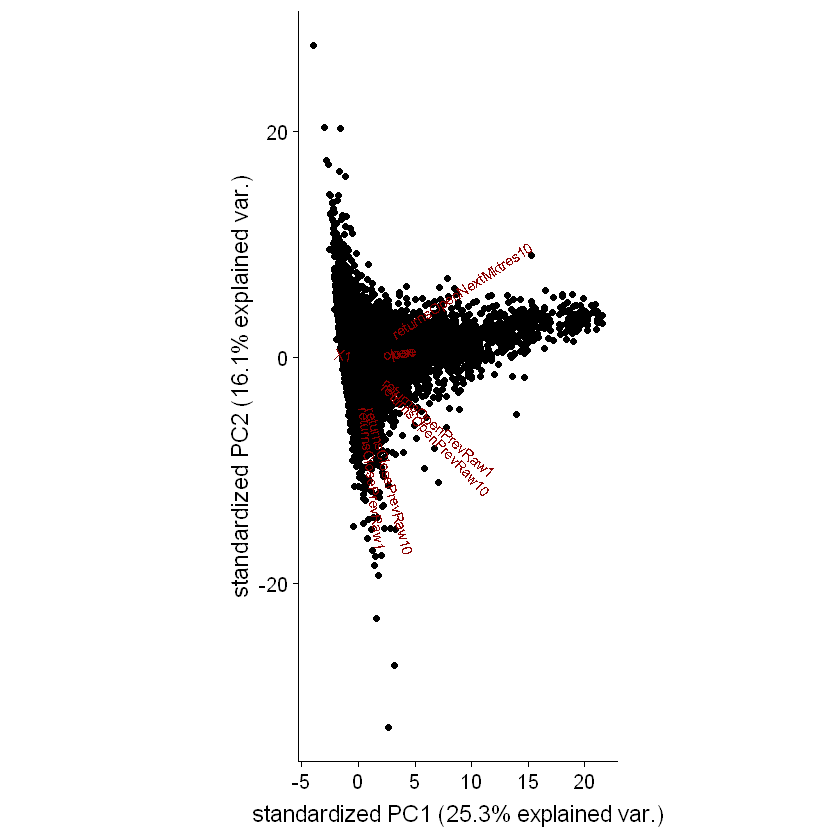

In [16]:
pca.prcomp(market.pca.data)

Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     1.443376e+05 4.285256e+01 1.970730e+01 1.935014e+01
Proportion of Variance 9.999999e-01 8.814442e-08 1.864213e-08 1.797253e-08
Cumulative Proportion  9.999999e-01 9.999999e-01 1.000000e+00 1.000000e+00
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     1.895596e+01 1.545588e+00 7.628560e-02 2.346893e-02
Proportion of Variance 1.724776e-08 1.146644e-10 2.793356e-13 2.643795e-14
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00

List of 7
 $ sdev    : Named num [1:8] 144337.6 42.9 19.7 19.4 19 ...
  ..- attr(*, "names")= chr [1:8] "Comp.1" "Comp.2" "Comp.3" "Comp.4" ...
 $ loadings: 'loadings' num [1:8, 1:8] 1.00 -9.26e-06 -9.23e-06 -4.35e-10 -2.52e-07 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:8] "X1" "close" "open" "returnsClosePrevRaw1" ...
  .. ..$ : chr [1:8] "Comp.1" "Comp.2

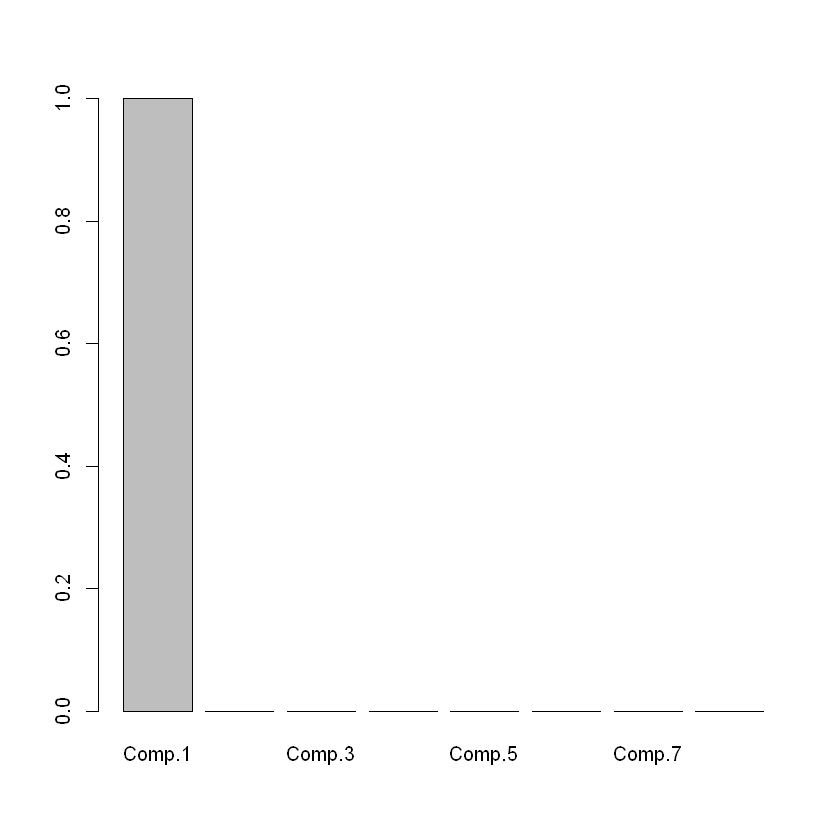

In [17]:
pca.princomp(market.pca.data)

From here it is clear that when we get a barplot by plotting the standard deviation of all the PC's divided by standard deviation of PC 1 we can observe that the only relevant component is Comp 1 which is "close"

In [18]:
news.pca.data = select_if(news, is.numeric)
head(news.pca.data)
colnames(news.pca.data)

X1,urgency,takeSequence,bodySize,companyCount,sentenceCount,wordCount,firstMentionSentence,relevance,sentimentClass,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,3,1,1438,1,11,275,6,0.235702,-1,...,0,0,0,0,0,0,0,3,6,7
1,3,1,4413,1,55,907,8,0.447214,-1,...,1,1,1,1,1,1,1,3,3,3
2,3,1,2108,2,15,388,14,0.377964,-1,...,0,0,0,0,0,0,0,5,11,17
3,3,1,1776,6,14,325,13,0.149071,-1,...,0,0,0,0,0,0,0,5,13,15
4,3,1,1776,6,14,325,11,0.149071,-1,...,0,0,0,0,0,0,0,0,0,0
5,3,1,1776,6,14,325,0,0.149071,-1,...,0,0,0,0,0,0,0,0,2,3


[1] "X1"                   "urgency"              "takeSequence"        
 [4] "bodySize"             "companyCount"         "sentenceCount"       
 [7] "wordCount"            "firstMentionSentence" "relevance"           
[10] "sentimentClass"       "sentimentNegative"    "sentimentNeutral"    
[13] "sentimentPositive"    "sentimentWordCount"   "noveltyCount12H"     
[16] "noveltyCount24H"      "noveltyCount3D"       "noveltyCount5D"      
[19] "noveltyCount7D"       "volumeCounts12H"      "volumeCounts24H"     
[22] "volumeCounts3D"       "volumeCounts5D"       "volumeCounts7D"

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.3634 2.0653 1.7372 1.5593 1.3318 1.17821 1.09265
Proportion of Variance 0.2327 0.1777 0.1258 0.1013 0.0739 0.05784 0.04974
Cumulative Proportion  0.2327 0.4105 0.5362 0.6375 0.7114 0.76926 0.81900
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.99158 0.85287 0.81920 0.64333 0.61067 0.56673 0.50812
Proportion of Variance 0.04097 0.03031 0.02796 0.01724 0.01554 0.01338 0.01076
Cumulative Proportion  0.85997 0.89028 0.91824 0.93549 0.95102 0.96441 0.97516
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.38139 0.32409 0.30415 0.28311 0.26242 0.20578 0.18047
Proportion of Variance 0.00606 0.00438 0.00385 0.00334 0.00287 0.00176 0.00136
Cumulative Proportion  0.98122 0.98560 0.98946 0.99280 0.99566 0.99743 0.99879
                         PC22    PC23      PC2

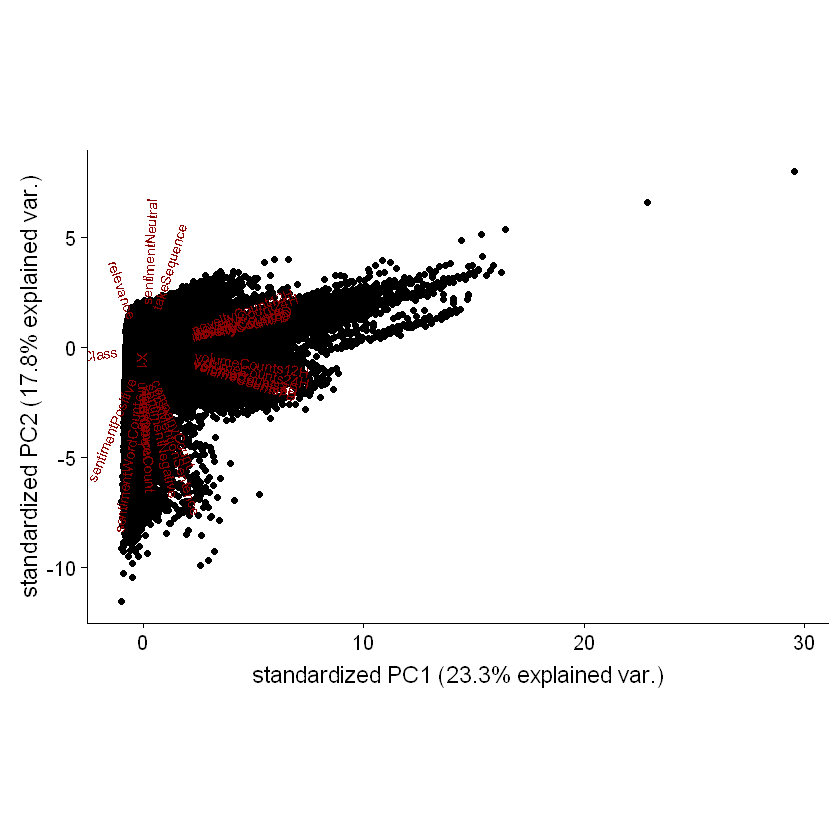

In [19]:
pca.prcomp(news.pca.data)


Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     1.443376e+05 5.414750e+03 2.632874e+02 1.323739e+02
Proportion of Variance 9.985903e-01 1.405352e-03 3.322680e-06 8.399101e-07
Cumulative Proportion  9.985903e-01 9.999956e-01 9.999989e-01 9.999998e-01
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     6.391052e+01 1.494313e+01 1.136969e+01 9.219118e+00
Proportion of Variance 1.957821e-07 1.070314e-08 6.196197e-09 4.073869e-09
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     8.585608e+00 6.200972e+00 5.845447e+00 3.768976e+00
Proportion of Variance 3.533218e-09 1.843095e-09 1.637811e-09 6.808871e-10
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
                            Comp.13      Comp.14      Comp.15      Comp.16

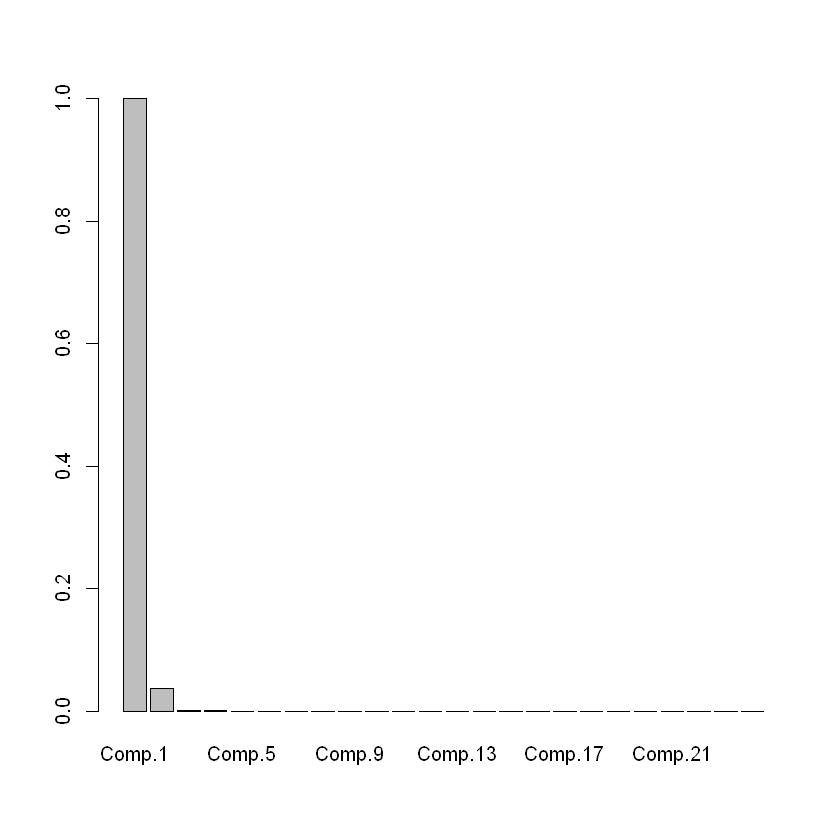

In [20]:
pca.princomp(news.pca.data)

From here it is clear that when we get a barplot by plotting the standard deviation of all the PC's divided by standard deviation of PC 1 we can observe that the only relevant component is Comp 1 which is "urgency"

## Word Cloud Generation

### Cleaning the heading of the news

In [1]:
abv = c("bn","am","pm")
rep = c("","","")
clean_function = function(data){
  data = replace_html(data)
  data = replace_tag(data)
  data = replace_email(data)
  data = replace_internet_slang(data)
  data = replace_url(data)
  data = str_replace_all(data, "<.*?>","") 
  data = lapply(data, function(x) gsub("[[:punct:]]"," ",x))
  data = str_replace_all(data, " – ", " ")
  data = gsub("\"", " ", data)
  data = removeNumbers(data)
  data = gsub("\\b\\d+\\b", "", data)
  data = replace_curly_quote(data)
  data = replace_symbol(data)
  data = replace_abbreviation(data,abv,rep)
  data = replace_abbreviation(data)
  data = replace_word_elongation(data)
  data = replace_contraction(data)
  data = replace_incomplete(data)
  data = iconv(data,from="UTF-8",to="ASCII//TRANSLIT")
  data = tolower(data)
  data = trimws(data)
  data = str_squish(data)
  data = str_replace_all(data, "[^a-zA-Z\\s]","") 
}

In [15]:
news_headline = news$headline
news_headline = clean_function(news_headline)

In [16]:
print("News Headline Before Cleaning")
head(news$headline)

[1] "News Headline Before Cleaning"


[1] "China's Daqing pumps 43.41 mln tonnes of oil in 06"
[2] "FEATURE-In kidnapping, finesse works best"         
[3] "PRESS DIGEST - Wall Street Journal - Jan 1"        
[4] "PRESS DIGEST - New York Times - Jan 1"             
[5] "PRESS DIGEST - New York Times - Jan 1"             
[6] "PRESS DIGEST - New York Times - Jan 1"

In [17]:
print("News Headline After Cleaning")
head(news_headline)

[1] "News Headline After Cleaning"


[1] "china s daqing pumps mln tonnes of oil in"
[2] "feature in kidnapping finesse works best" 
[3] "press digest wall street journal jan"     
[4] "press digest new york times jan"          
[5] "press digest new york times jan"          
[6] "press digest new york times jan"

### Stemming, Tokenisation

In [18]:
tokenized_words = tokenize_word_stems(news_headline, stopwords = stopwords::stopwords("en"))
word_count = sapply(tokenized_words,function(x){length(unlist(x))})
word_count = as.data.frame(word_count)

### Corpus of Words

In [19]:
corpus_words = Corpus(VectorSource(tokenized_words))
corpus_words

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 100000

### Term Document Matrix and Document Term Matrix

In [38]:
print("Term Document Matrix")
tdm = TermDocumentMatrix(corpus_words,control=list(wordLengths=c(3,Inf)))
inspect(tdm)
tdm = tdm[1:10000,1:10000]
tdm_df = as.data.frame(as.matrix(tdm), stringsAsFactors=False)

[1] "Term Document Matrix"
<<TermDocumentMatrix (terms: 18558, documents: 100000)>>
Non-/sparse entries: 706934/1855093066
Sparsity           : 100%
Maximal term length: 23
Weighting          : term frequency (tf)
Sample             :
         Docs
Terms     13109 13111 25844 28492 41196 53234 53242 5464 80525 80526
  announc     1     1     1     0     0     0     0    0     0     0
  inc         1     1     0     0     0     0     0    0     0     0
  mln         0     0     0     0     0     0     0    0     0     0
  quarter     1     1     1     0     1     2     2    0     0     0
  say         0     0     0     1     0     0     0    0     0     0
  share       2     2     0     0     3     2     2    0     0     0
  shr         0     0     0     0     0     0     0    0     0     0
  stock       0     0     0     0     0     0     0    1     0     0
  updat       0     0     0     0     0     0     0    0     0     0
  view        0     0     0     0     0     0     0    0     

In [24]:
print("Document Term Matrix")
dtm = DocumentTermMatrix(corpus_words,control=list(wordLengths=c(3,Inf)))
inspect(dtm)

[1] "Document Term Matrix"
<<DocumentTermMatrix (documents: 100000, terms: 18558)>>
Non-/sparse entries: 706934/1855093066
Sparsity           : 100%
Maximal term length: 23
Weighting          : term frequency (tf)
Sample             :
       Terms
Docs    announc inc mln quarter say share shr stock updat view
  13109       1   1   0       1   0     2   0     0     0    0
  13111       1   1   0       1   0     2   0     0     0    0
  25844       1   0   0       1   0     0   0     0     0    0
  28492       0   0   0       0   1     0   0     0     0    0
  41196       0   0   0       1   0     3   0     0     0    0
  53234       0   0   0       2   0     2   0     0     0    0
  53242       0   0   0       2   0     2   0     0     0    0
  5464        0   0   0       0   0     0   0     1     0    0
  80525       0   0   0       0   0     0   0     0     0    0
  80526       0   0   0       0   0     0   0     0     0    0


### Word Cloud

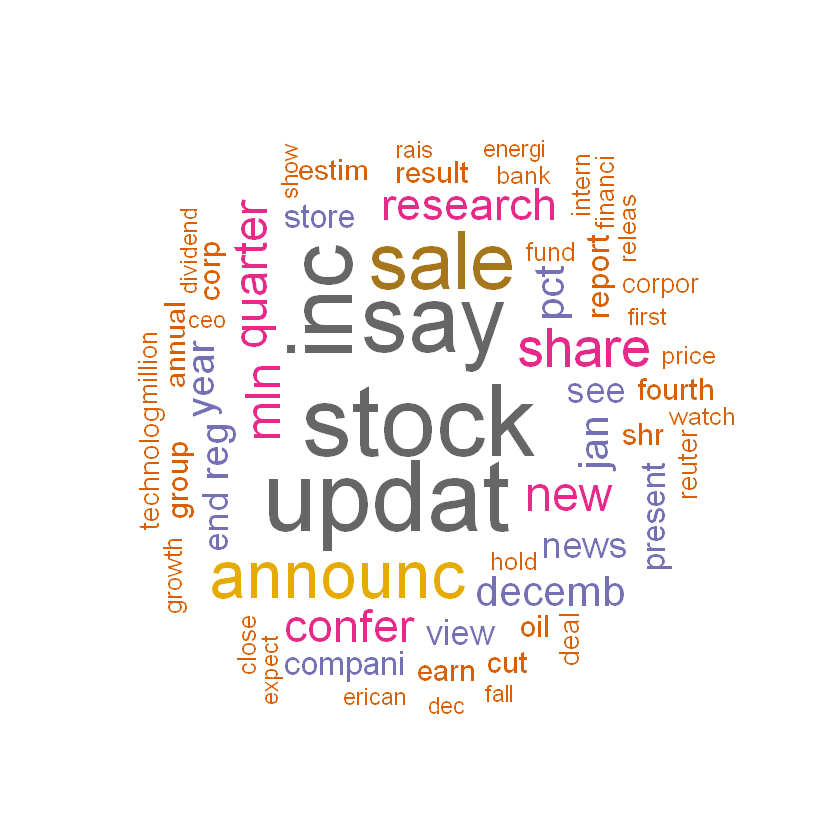

In [39]:
m1 = tdm_df
v1 = sort(rowSums(m1),decreasing = TRUE)
d1 = data.frame(word = names(v1),freq =v1)
wordcloud(words = d1$word, freq = d1$freq, min.freq = 1,
          scale=c(5,0.5), use.r.layout=FALSE,
          max.words=60, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))